<a href="https://colab.research.google.com/github/gkdivya/EVA/blob/master/Batch%20Normalization%20%26%20Regularization/NormalizationAndRegularizationOnMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.utils import np_utils

from keras.datasets import mnist

In [3]:
(trainX, trainY), (testX, testY) = mnist.load_data()


11493376/11490434 [==============================] - 0s 0us/step


In [28]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


(60000, 28, 28)


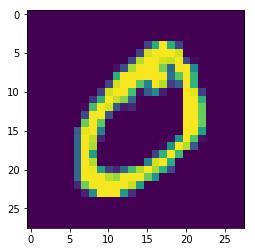

In [4]:
print (trainX.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(trainX[1])

In [0]:
trainX = trainX.reshape(trainX.shape[0], 28, 28,1)
testX = testX.reshape(testX.shape[0], 28, 28,1)

In [0]:
trainX = trainX.astype('float32')
testX = testX.astype('float32')
trainX /= 255
testX /= 255

In [0]:
trainY[:10]
trainY = np_utils.to_categorical(trainY, 10)
testY = np_utils.to_categorical(testY, 10)

In [0]:
# applying transformation to image
train_gen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
test_gen = ImageDataGenerator()

In [0]:
training_set= train_gen.flow(trainX, trainY, batch_size=128)
test_set= train_gen.flow(testX, testY, batch_size=128)

In [21]:
trainY[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [23]:
from keras.layers import Activation
model = Sequential()
 
model.add(Convolution2D(16, (3, 3), input_shape=(28,28,1), use_bias=False)) #26
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Activation('relu'))

model.add(Convolution2D(16, (3, 3), use_bias=False)) #24
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Activation('relu'))

model.add(Convolution2D(10, 1, 1, activation='relu', use_bias=False)) #22
model.add(MaxPooling2D(pool_size=(2, 2)))#11

model.add(Convolution2D(16, (3, 3), use_bias=False))#9
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Activation('relu'))


model.add(Convolution2D(16, (3, 3), use_bias=False))#7
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Activation('relu'))


model.add(Convolution2D(16, (3, 3), use_bias=False))#5
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Activation('relu'))


model.add(Convolution2D(16, (3, 3), use_bias=False))#3
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Activation('relu'))


model.add(Convolution2D(10, 4, 4, use_bias=False))
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Flatten())
model.add(Activation('softmax'))


model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu", use_bias=False)`
  


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 26, 26, 16)        144       
_________________________________________________________________
batch_normalization_29 (Batc (None, 26, 26, 16)        64        
_________________________________________________________________
dropout_29 (Dropout)         (None, 26, 26, 16)        0         
_________________________________________________________________
activation_23 (Activation)   (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 24, 24, 16)        2304      
_________________________________________________________________
batch_normalization_30 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_30 (Dropout)         (None, 24, 24, 16)        0         
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (4, 4), use_bias=False)`


In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)               
                         

In [0]:
# checkpoint
outputFolder = './NormalizationAndRegularization'
if not os.path.exists(outputFolder):
    os.makedirs(outputFolder)
filepath=outputFolder+"/weights-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, \
                             save_best_only=True, save_weights_only=True, \
                             mode='auto', period=10)

In [0]:
# define early stopping callback
earlystop = EarlyStopping(monitor='val_acc', min_delta=0.0001, patience=5, \
                          verbose=1, mode='auto')

In [38]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])
callbacks_list = [earlystop, checkpoint, LearningRateScheduler(scheduler, verbose=1)]
#model.fit(trainX, trainY, batch_size=128, epochs=20, verbose=1, validation_data=(testX, testY), callbacks=[LearningRateScheduler(scheduler, verbose=1)])
model.fit_generator(training_set, steps_per_epoch=60000//128,  validation_data= test_set, validation_steps=10000//128, epochs=5, callbacks=callbacks_list)
                        
          

Epoch 1/5


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '



Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
468/468 [==============================] - 9s 20ms/step - loss: 0.1088 - acc: 0.9526 - val_loss: 0.0357 - val_acc: 0.9892
Epoch 2/5

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
468/468 [==============================] - 7s 14ms/step - loss: 0.1032 - acc: 0.9544 - val_loss: 0.0253 - val_acc: 0.9935
Epoch 3/5

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
468/468 [==============================] - 7s 14ms/step - loss: 0.1011 - acc: 0.9533 - val_loss: 0.0236 - val_acc: 0.9935
Epoch 4/5

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
468/468 [==============================] - 7s 14ms/step - loss: 0.0941 - acc: 0.9558 - val_loss: 0.0214 - val_acc: 0.9941
Epoch 5/5

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
468/468 [==============================] - 7s 14ms/step - loss: 0.0929 - acc: 0.9558 - val_loss: 0.0222 

In [0]:

score = model.evaluate(testX, testY, verbose=0)
print(score)

[0.020282837163330986, 0.994]
